In [1]:
import importlib.util
spec = importlib.util.spec_from_file_location("BoundaryLayerToolbox", "/Users/claudiopierard/VC/BoundaryLayerToolbox.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)
import matplotlib
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
import scipy.interpolate as interpolate
from netCDF4 import Dataset
import os
import pandas as pd
#pd.set_option('html', False)
from IPython import display

#matplotlib
from matplotlib import animation
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import datetime

from scipy.stats import stats

xlat = np.loadtxt("/Users/claudiopierard/VC/datos/xlat_d02_interpolado.txt")
xlong = np.loadtxt("/Users/claudiopierard/VC/datos/xlong_d02_interpolado.txt")
hgt = np.loadtxt("/Users/claudiopierard/VC/datos/hgt_d02_interpolado.txt")
#months = {1:'jun', 2:'feb', 3:'mar',4: 'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dic'}
path2datosVC = "../datos/dataframes_VC/cca/"
path2pollutants = "../datos/contaminantes/2015/CCA/"

path2estaciones = "../datos/loc_estaciones/air_quality_stn.xy"
estaciones = pd.read_table(path2estaciones, index_col=0, names=['long','lat', 'height'])
estaciones = estaciones.transpose().to_dict()
estaciones['CCA']

months = {'jan': '01', 'feb': '02', 'mar': '03', 'apr': '04', 'may': '05', 'jun': '06', 'jul': '07', 'aug': '08', 'sep': '09', 'oct':'10', 'nov':'11', 'dic': '12'}

/Users/claudiopierard/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Contaminantes

In [2]:
o3_2015 = pd.read_csv(path2pollutants + "CCA_o3_2015.csv", index_col=0)
o3_2015.index = pd.to_datetime(o3_2015.index)

In [3]:
pm25_2015 = pd.read_csv(path2pollutants + "CCA_pm25_2015.csv", index_col=0)
pm25_2015.index = pd.to_datetime(pm25_2015.index)

In [4]:
co_2015 = pd.read_csv(path2pollutants + "CCA_co_2015.csv", index_col=0)
co_2015.index = pd.to_datetime(co_2015.index)

In [5]:
pm25_2015.head()

,station,pm25
2015-01-01 01:00:00,CCA,118.0
2015-01-01 02:00:00,CCA,107.0
2015-01-01 03:00:00,CCA,121.0
2015-01-01 04:00:00,CCA,124.0
2015-01-01 05:00:00,CCA,123.0


#### Contaminantes dimless

In [6]:
pd.concat([o3_2015["2015-06-01":"2015-06-30"]['o3'], pm25_2015["2015-06-01":"2015-06-30"]['pm25']], axis=1)

,o3,pm25
2015-06-01 00:00:00,17.0,6.0
2015-06-01 01:00:00,19.0,10.0
2015-06-01 02:00:00,19.0,6.0
2015-06-01 03:00:00,20.0,7.0
2015-06-01 04:00:00,15.0,6.0
2015-06-01 05:00:00,12.0,5.0
2015-06-01 06:00:00,6.0,7.0
2015-06-01 07:00:00,3.0,12.0
2015-06-01 08:00:00,3.0,15.0
2015-06-01 09:00:00,16.0,10.0


In [7]:
o3_dimless = o3_2015["2015-06-01":"2015-06-30"]['o3'] / 95 #ppb #o3_2015["2015-06-01":"2015-06-30"]['o3'].max()

In [8]:
o3_dimless.shape

(720,)

In [9]:
pm25_dimless = pm25_2015["2015-06-01":"2015-06-30"]['pm25'] / 45 #pm25_2015["2015-06-01":"2015-06-30"]['pm25'].max()

In [10]:
co_dimless = co_2015["2015-06-01":"2015-06-30"]['co'] / 0.708066 #co_2015.mean() #11 #co_2015["2015-06-01":"2015-06-30"]['co'].max()

In [11]:
co_2015.mean()

co    0.708066
dtype: float64

# jun

In [12]:
jun_vc = pd.read_csv(path2datosVC + "jun_dataframe_cca.csv", index_col=0)
jun_vc.index = pd.to_datetime(jun_vc.index)

#### Adimensionalizarlo en términos de vc_max_prom_anual y vc_prom_anual

In [13]:
vc_anual = pd.read_csv('../datos/dataframes_VC/cca/VC_promedios_anuales_cca.csv', index_col=0)

In [14]:
vc_anual

,VC_prom_anual,VC_prom_max_anual
0,1616.18901,5797.0125


### prom_max_anual

In [15]:
vc_anual.VC_prom_max_anual.values

array([5797.0125])

In [16]:
vc_dimless = jun_vc['VC_24']/ vc_anual.VC_prom_max_anual.values

In [17]:
vc_dimless.shape

(720,)

In [18]:
master = pd.concat([vc_dimless, o3_dimless], axis=1)

In [19]:
master.dropna()

,VC_24,o3
2015-06-01 00:00:00,0.158530,0.178947
2015-06-01 01:00:00,0.151975,0.200000
2015-06-01 02:00:00,0.159392,0.200000
2015-06-01 03:00:00,0.102467,0.210526
2015-06-01 04:00:00,0.093151,0.157895
2015-06-01 05:00:00,0.081594,0.126316
2015-06-01 06:00:00,0.083491,0.063158
2015-06-01 07:00:00,0.068656,0.031579
2015-06-01 08:00:00,0.076936,0.031579
2015-06-01 09:00:00,0.085734,0.168421


In [20]:
a = 0.943

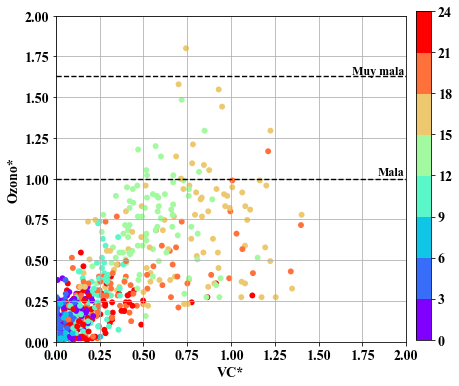

In [21]:
plt.rcParams['font.family'] = "Times New Roman"

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize = (6.9,6))
ax = fig.add_subplot(111)

#Bandas de colores 95ppb --> 1 (mala) y 155ppb --> 1.63 (muy mala) CAMe


#ax.axhline(70/95, 0, 2, color = 'k', linestyle = '--', linewidth = 1.4)
ax.axhline(1, 0, 2, color = 'k', linestyle = '--', linewidth = 1.4)
ax.axhline(155/95, 0, 2, color = 'k', linestyle = '--', linewidth = 1.4)

#ax.axhspan(0, 70/95, color = '#00ff00', alpha = 0.1)
#ax.axhspan(70/95, 1, color = '#ffcc00', alpha = 0.1)
#ax.axhspan(1, 155/95, color = '#ff8000', alpha = 0.1)
#ax.axhspan(155/95, 2, color = '#ff0000', alpha = 0.1)
#####

tag = (vc_dimless.index.hour)
cmap = plt.cm.rainbow #matplotlib.colors.ListedColormap(['black','yellow', 'red', 'blue', 'white', 'green'])
# extract all colors from the .rainbow map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0,24, 9)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

#
im = ax.scatter(vc_dimless, o3_dimless, cmap=cmap, norm=norm, c=tag, edgecolors='none', s = 35)

fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.76])
fig.colorbar(im, cax=cbar_ax)

ax.text(1.69, 1.64, 'Muy mala', fontsize=12)
ax.text(1.84, 1.02, 'Mala', fontsize=12)
ax.set_ylim(0, 2)
ax.set_xlim(0, 2)
#ax.colorbar()
ax.set_ylabel('Ozono*')
ax.set_xlabel('VC*')
ax.grid()

In [22]:
stats.linregress(master.between_time('09:00', '12:00').dropna()['VC_24'], master.between_time('09:00', '12:00').dropna()['o3'])

LinregressResult(slope=1.169088385347137, intercept=0.047683485317008056, rvalue=0.6951006285173347, pvalue=6.8050241950895006e-18, stderr=0.11374608297464912)

In [23]:
stats.pearsonr(pd.concat([vc_dimless, o3_dimless], axis=1).dropna()['o3'], pd.concat([o3_dimless, vc_dimless], axis=1).dropna()['VC_24'])

(0.7154390044694457, 1.6058338420897316e-107)

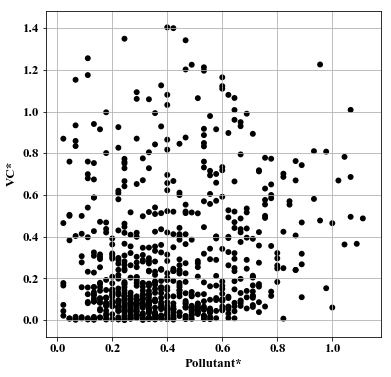

In [36]:
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams.update({'font.size': 13})
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.scatter(pm25_dimless, vc_dimless, edgecolors='none', s = 35, c = 'k')

#ax.set_ylim(0, 1.02)
#ax.set_xlim(0, 1.02)
ax.set_ylabel('VC*')
ax.set_xlabel('Pollutant*')
ax.grid()

In [26]:
vc_dimless.shape

(720,)

In [27]:
np.zeros_like(vc_dimless) + np.random.rand(720)

array([5.21508652e-01, 7.73397046e-01, 5.75898095e-01, 9.16752344e-01,
       8.45900713e-01, 4.50264798e-01, 6.51447797e-01, 3.52335901e-02,
       1.97540144e-01, 6.87193145e-01, 2.29351374e-01, 2.24846928e-01,
       4.30877806e-01, 9.51046136e-01, 1.83258879e-01, 8.57124655e-01,
       5.79414109e-01, 1.34939225e-01, 5.41549896e-01, 8.29340277e-01,
       4.76125521e-01, 7.92496637e-01, 4.91697944e-01, 3.20650533e-01,
       2.95837970e-01, 8.59893765e-02, 3.11603214e-01, 4.37330990e-01,
       6.60286251e-01, 9.57117631e-01, 4.56262570e-01, 4.40187305e-02,
       2.28756713e-01, 8.11265103e-01, 9.89749608e-01, 1.61680609e-01,
       1.55705571e-01, 3.02505787e-01, 6.57912495e-01, 4.98832516e-01,
       5.01222354e-01, 6.94641709e-01, 4.95546844e-01, 5.93413856e-01,
       3.71805177e-01, 4.71063983e-01, 6.98453737e-01, 6.90721977e-01,
       5.99032083e-02, 2.33151611e-01, 2.94570086e-02, 8.47311042e-01,
       7.32061986e-02, 3.75872102e-01, 5.34413170e-01, 8.68031614e-02,
      

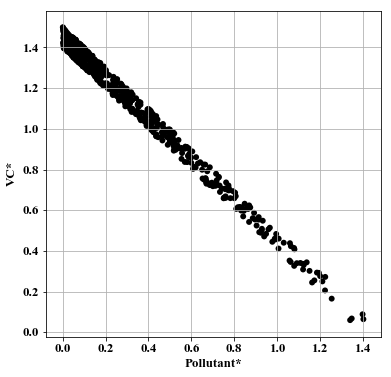

In [41]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.scatter(vc_dimless, -vc_dimless + np.random.rand(720)*0.1 + 1.4, edgecolors='none', s = 35, c = 'k')

#ax.set_ylim(0, 1.02)
#ax.set_xlim(0, 1.02)
ax.set_ylabel('VC*')
ax.set_xlabel('Pollutant*')
ax.grid()

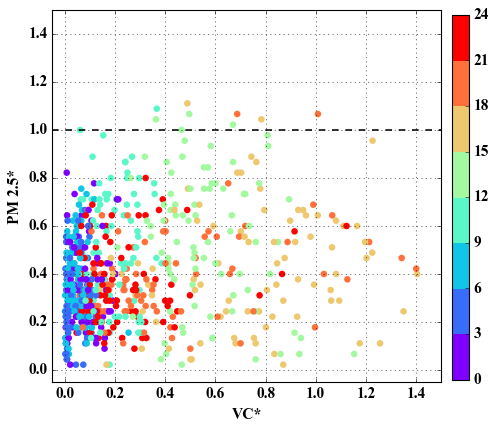

In [51]:
plt.rcParams['font.family'] = "Times New Roman"

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize = (6.9,6))
ax = fig.add_subplot(111)

#Bandas de colores 95ppb --> 1 (mala) y 155ppb --> 1.63 (muy mala) CAMe


#ax.axhline(70/95, 0, 2, color = 'k', linestyle = '--', linewidth = 1.4)
ax.axhline(1, 0, 2, color = 'k', linestyle = '--', linewidth = 1.4)
#ax.axhline(155/95, 0, 2, color = 'k', linestyle = '--', linewidth = 1.4)

#ax.axhspan(0, 70/95, color = '#00ff00', alpha = 0.1)
#ax.axhspan(70/95, 1, color = '#ffcc00', alpha = 0.1)
#ax.axhspan(1, 155/95, color = '#ff8000', alpha = 0.1)
#ax.axhspan(155/95, 2, color = '#ff0000', alpha = 0.1)
#####

tag = (vc_dimless.index.hour)
cmap = plt.cm.rainbow #matplotlib.colors.ListedColormap(['black','yellow', 'red', 'blue', 'white', 'green'])
# extract all colors from the .rainbow map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0,24, 9)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

#
im = ax.scatter(vc_dimless, pm25_dimless, cmap=cmap, norm=norm, c=tag, edgecolors='none', s = 35)

fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.76])
fig.colorbar(im, cax=cbar_ax)

#ax.text(1.69, 1.64, 'Muy mala', fontsize=12)
#ax.text(1.84, 1.02, 'Mala', fontsize=12)
ax.set_ylim(-0.05, 1.5)
ax.set_xlim(-0.05, 1.5)
#ax.colorbar()
ax.set_ylabel('PM 2.5*')
ax.set_xlabel('VC*')
ax.grid()

In [27]:
stats.pearsonr(pd.concat([vc_dimless, pm25_dimless], axis=1).dropna()['pm25'], pd.concat([pm25_dimless, vc_dimless], axis=1).dropna()['VC_24'])

(0.19111321585415628, 4.4097980219107845e-07)

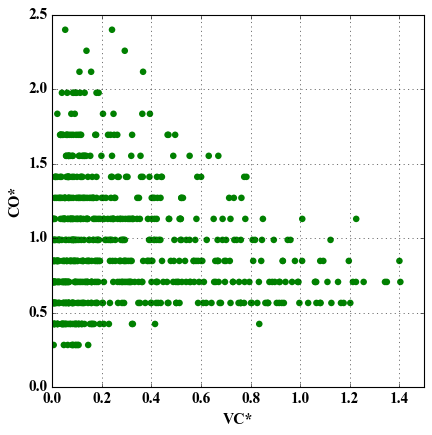

In [46]:
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.scatter(vc_dimless, co_dimless, edgecolors='none', s = 35, c = 'g')

ax.set_ylim(0, 2.5)
ax.set_xlim(0, 1.5)
ax.set_xlabel('VC*')
ax.set_ylabel('CO*')
ax.grid()

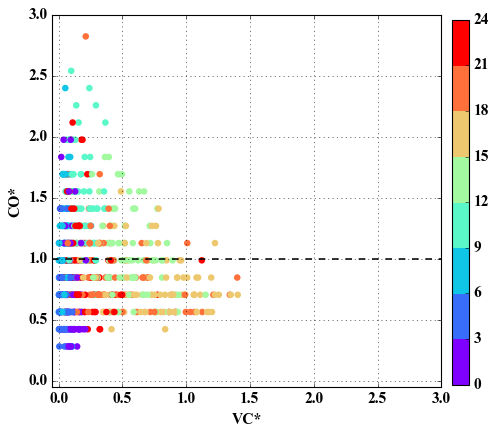

In [52]:
plt.rcParams['font.family'] = "Times New Roman"

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize = (6.9,6))
ax = fig.add_subplot(111)

#Bandas de colores 95ppb --> 1 (mala) y 155ppb --> 1.63 (muy mala) CAMe


#ax.axhline(70/95, 0, 2, color = 'k', linestyle = '--', linewidth = 1.4)
ax.axhline(1, 0, 2, color = 'k', linestyle = '--', linewidth = 1.4)
#ax.axhline(155/95, 0, 2, color = 'k', linestyle = '--', linewidth = 1.4)

#ax.axhspan(0, 70/95, color = '#00ff00', alpha = 0.1)
#ax.axhspan(70/95, 1, color = '#ffcc00', alpha = 0.1)
#ax.axhspan(1, 155/95, color = '#ff8000', alpha = 0.1)
#ax.axhspan(155/95, 2, color = '#ff0000', alpha = 0.1)
#####

tag = (vc_dimless.index.hour)
cmap = plt.cm.rainbow #matplotlib.colors.ListedColormap(['black','yellow', 'red', 'blue', 'white', 'green'])
# extract all colors from the .rainbow map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0,24, 9)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

#
im = ax.scatter(vc_dimless, co_dimless, cmap=cmap, norm=norm, c=tag, edgecolors='none', s = 35)

fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.76])
fig.colorbar(im, cax=cbar_ax)

#ax.text(1.69, 1.64, 'Muy mala', fontsize=12)
#ax.text(1.84, 1.02, 'Mala', fontsize=12)
ax.set_ylim(-0.05, 3)
ax.set_xlim(-0.05, 3)
#ax.colorbar()
ax.set_ylabel('CO*')
ax.set_xlabel('VC*')
ax.grid()

In [61]:
co_dimless.between_time('07:00', '18:00')

2015-06-01 07:00:00    1.271068
2015-06-01 08:00:00    1.835987
2015-06-01 09:00:00    0.988608
2015-06-01 10:00:00    0.564919
2015-06-01 11:00:00    0.847379
2015-06-01 12:00:00    1.129838
2015-06-01 13:00:00    1.129838
2015-06-01 14:00:00    0.847379
2015-06-01 15:00:00    0.564919
2015-06-01 16:00:00    0.564919
2015-06-01 17:00:00    0.564919
2015-06-01 18:00:00    0.564919
2015-06-02 07:00:00    1.271068
2015-06-02 08:00:00    1.271068
2015-06-02 09:00:00    1.977217
2015-06-02 10:00:00    1.553527
2015-06-02 11:00:00    1.129838
2015-06-02 12:00:00    1.271068
2015-06-02 13:00:00    1.553527
2015-06-02 14:00:00    1.271068
2015-06-02 15:00:00    1.129838
2015-06-02 16:00:00    0.706149
2015-06-02 17:00:00    0.564919
2015-06-02 18:00:00    0.564919
2015-06-03 07:00:00    1.129838
2015-06-03 08:00:00    1.553527
2015-06-03 09:00:00    1.694757
2015-06-03 10:00:00    1.412298
2015-06-03 11:00:00    1.553527
2015-06-03 12:00:00    1.553527
                         ...   
2015-06-

In [29]:
stats.pearsonr(pd.concat([vc_dimless, co_dimless], axis=1).dropna()['co'], pd.concat([co_dimless, vc_dimless], axis=1).dropna()['VC_24'])

(-0.13632035717537055, 0.00036764426222405918)

In [ ]:
#FFFFFF
#F0A3FF
#0075DC
#993F00
#4C005C
#191919
#005C31
#2BCE48
#FFCC99
#808080
#94FFB5
#8F7C00
#9DCC00
#C20088
#003380
#FFA405
#FFA8BB
#426600
#FF0010	 	Red
#5EF1F2	 	Sky
#00998F	 	Turquoise
#740AFF	 	Violet
#990000	 	Wine
#FFFF00	 	Yellow
#FF5005	 	Zinnia

# Alturas máximas

In [30]:
mm = 'jun'

firstday = '2015-' + months[mm] + '-01'

last_day = np.int(blt.E1or30(mm))
rng = pd.date_range(firstday, periods=last_day, freq='D')

month_list = []
names = ['vc_max', 'o3_max', 'pm25_max', 'co_max']

o3_max = []
vc_max = []
pm25_max = []
co_max = []

for i in rng:
    #print(i.date())
    o3_max.append(o3_dimless[str(i.date())].max())
    pm25_max.append(pm25_dimless[str(i.date())].max())
    co_max.append(co_dimless[str(i.date())].max())
    #print(o3_dimless[str(i.date())])
    vc_max.append(vc_dimless[str(i.date())].max())
    

MAXX = pd.DataFrame({'vc_max': vc_max, 'o3_max': o3_max, 'pm25_max':pm25_max, 'co_max':co_max})    
MAXX.index = rng

In [31]:
MAXX.head()

            co_max    o3_max  pm25_max    vc_max
2015-06-01    0.65  0.747368      0.62  1.125580
2015-06-02    0.70  1.094737      0.76  1.341726
2015-06-03    0.60  0.957895      0.90  1.122130
2015-06-04    0.50  1.052632      0.74  1.403654
2015-06-05    0.60  0.557895      0.54  0.436087

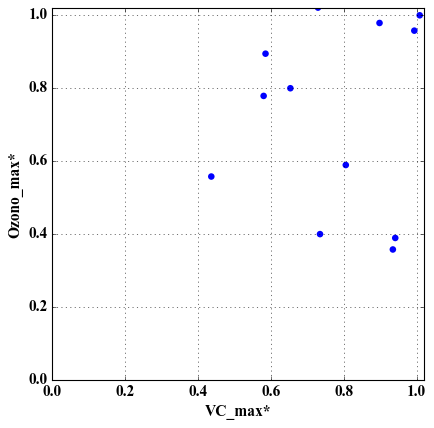

In [32]:
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.scatter(MAXX['vc_max'], MAXX['o3_max'], edgecolors='none', s = 35, c = 'b')

ax.set_ylim(0, 1.02)
ax.set_xlim(0, 1.02)
ax.set_ylabel('Ozono_max*')
ax.set_xlabel('VC_max*')
ax.grid()

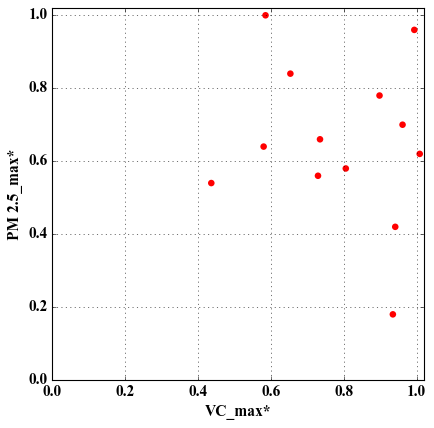

In [33]:
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.scatter(MAXX['vc_max'], MAXX['pm25_max'], edgecolors='none', s = 35, c = 'r')

ax.set_ylim(0, 1.02)
ax.set_xlim(0, 1.02)
ax.set_ylabel('PM 2.5_max*')
ax.set_xlabel('VC_max*')
ax.grid()

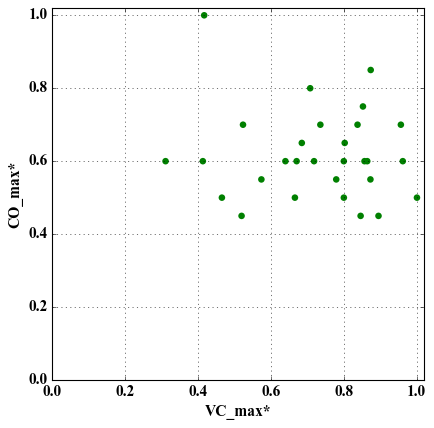

In [125]:
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.scatter(MAXX['vc_max'], MAXX['co_max'], edgecolors='none', s = 35, c = 'g')

ax.set_ylim(0, 1.02)
ax.set_xlim(0, 1.02)
ax.set_ylabel('CO_max*')
ax.set_xlabel('VC_max*')
ax.grid()

In [20]:
np.linspace(0, 1, 11)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

# Areas VC y contaminantes

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html

In [69]:
jun_vc['2015-06-06']['VC_24']

2015-06-06 00:00:00     750.0
2015-06-06 01:00:00     522.0
2015-06-06 02:00:00     386.0
2015-06-06 03:00:00     326.0
2015-06-06 04:00:00     534.0
2015-06-06 05:00:00     308.0
2015-06-06 06:00:00     259.0
2015-06-06 07:00:00     286.0
2015-06-06 08:00:00     186.0
2015-06-06 09:00:00     369.0
2015-06-06 10:00:00     814.0
2015-06-06 11:00:00    1438.0
2015-06-06 12:00:00    2459.0
2015-06-06 13:00:00    3370.0
2015-06-06 14:00:00    3306.0
2015-06-06 15:00:00    3134.0
2015-06-06 16:00:00    3785.0
2015-06-06 17:00:00    1631.0
2015-06-06 18:00:00    1195.0
2015-06-06 19:00:00     302.0
2015-06-06 20:00:00    1093.0
2015-06-06 21:00:00     588.0
2015-06-06 22:00:00     272.0
2015-06-06 23:00:00     521.0
Name: VC_24, dtype: float64

In [70]:
np.trapz(jun_vc['2015-06-06']['VC_24'], jun_vc['2015-06-06'].index.hour, axis = 0)

27198.5

In [72]:
np.trapz(o3_2015['2015-06-06']['o3'], o3_2015['2015-06-06'].index.hour, axis = 0)

517.0

In [71]:
np.trapz(vc_dimless['2015-06-06'], vc_dimless['2015-06-06'].index.hour, axis = 0)

3.3425709721027412

In [78]:
np.trapz(o3_dimless['2015-06-06'], o3_dimless['2015-06-06'].index.hour, axis = 0)

3.0233918128654969

In [88]:
mm = 'jun'

firstday = '2015-' + months[mm] + '-01'

last_day = np.int(blt.E1or30(mm))
rng = pd.date_range(firstday, periods=last_day, freq='D')

month_list = []
names = ['vc_int', 'o3_int', 'pm25_int', 'co_int']

o3_int = []
vc_int = []
pm25_int = []
co_int = []

for i in rng:
    #print(i.date())
    o3_int.append(np.trapz(o3_dimless[str(i.date())], o3_dimless[str(i.date())].index.hour, axis = 0))
    pm25_int.append(np.trapz(pm25_dimless[str(i.date())], pm25_dimless[str(i.date())].index.hour, axis = 0))
    co_int.append(np.trapz(co_dimless[str(i.date())], co_dimless[str(i.date())].index.hour, axis = 0))
    #print(o3_dimless[str(i.date())])
    vc_int.append(np.trapz(vc_dimless[str(i.date())], vc_dimless[str(i.date())].index.hour, axis = 0))
    

intX = pd.DataFrame({'vc_int': vc_int, 'o3_int': o3_int, 'pm25_int':pm25_int, 'co_int':co_int})    
intX.index = rng

In [89]:
intX

            co_int    o3_int  pm25_int    vc_int
2015-06-01   5.600  4.035088      5.52  5.443837
2015-06-02   7.050  5.055556      8.67  7.934927
2015-06-03   7.825  4.967836     11.99  4.927492
2015-06-04   6.525  5.345029      9.28  6.033428
2015-06-05   7.450  2.663743      8.50  2.718938
2015-06-06   7.650  3.023392     10.64  3.342571
2015-06-07     NaN       NaN       NaN  5.748495
2015-06-08     NaN       NaN       NaN  6.500000
2015-06-09     NaN       NaN       NaN  6.065319
2015-06-10   7.700  7.730994     12.69  5.206034
2015-06-11   7.150  7.008772     11.29  5.534534
2015-06-12   8.075  4.961988       NaN       NaN
2015-06-13   6.950  3.903509      7.35  4.422576
2015-06-14     NaN       NaN       NaN  5.157552
2015-06-15   7.275  2.166667      3.52  4.151899
2015-06-16   6.950  3.286550      6.53  3.542399
2015-06-17   9.475  4.903509     10.27  4.106182
2015-06-18   9.725  1.511696      9.35  3.545656
2015-06-19   6.825  3.108187      4.94  5.287821
2015-06-20   6.800  

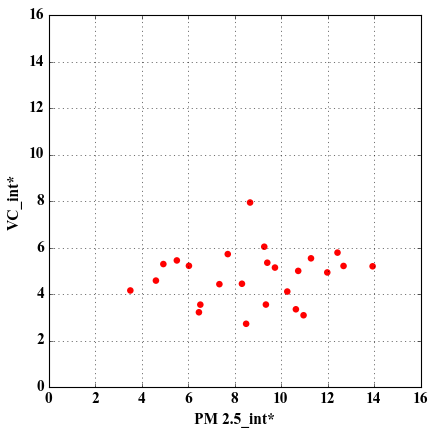

In [99]:
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.scatter(intX['pm25_int'], intX['vc_int'], edgecolors='none', s = 35, c = 'r')

ax.set_ylim(0, 16)
ax.set_xlim(0, 16)
ax.set_xlabel('PM 2.5_int*')
ax.set_ylabel('VC_int*')
ax.grid()

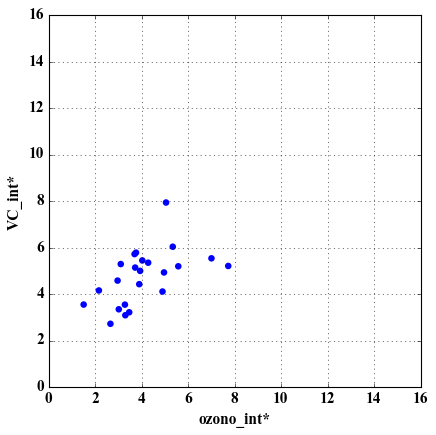

In [95]:
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.scatter(intX['o3_int'], intX['vc_int'], edgecolors='none', s = 35, c = 'b')

ax.set_ylim(0, 16)
ax.set_xlim(0, 16)
ax.set_xlabel('ozono_int*')
ax.set_ylabel('VC_int*')
ax.grid()

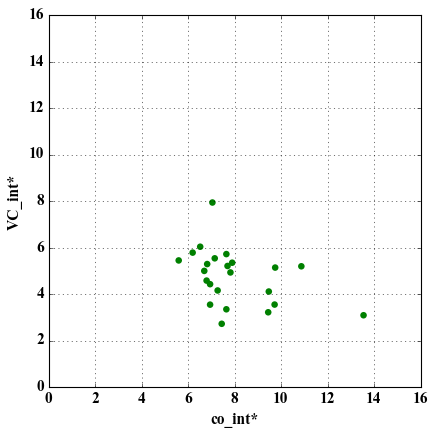

In [94]:
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.scatter(intX['co_int'], intX['vc_int'], edgecolors='none', s = 35, c = 'g')

ax.set_ylim(0, 16)
ax.set_xlim(0, 16)
ax.set_xlabel('co_int*')
ax.set_ylabel('VC_int*')
ax.grid()